In [52]:
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.utils import to_categorical

import numpy as np
import sys
import tensorflow as tf

seed = 0
np.random.seed(3)
tf.random.set_seed(3)

(x_train, y_train),(x_test, y_test) = mnist.load_data()

print(x_train.shape[0])
print(x_test.shape[0])


60000
10000


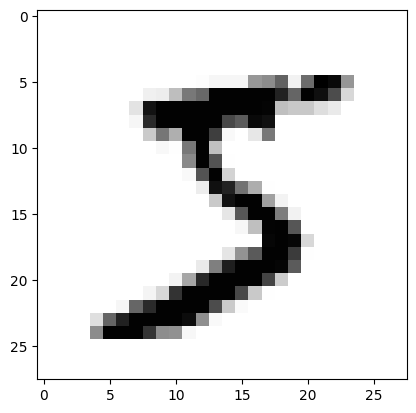

In [37]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap="Greys")
plt.show()

In [38]:
for x in x_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [41]:
x_train = x_train.reshape(x_train.shape[0], 784)
x_train = x_train.astype("float64")
x_train = x_train/255

In [42]:
x_test = x_test.reshape(x_test.shape[0], 784).astype("float64")/255


In [43]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

model = Sequential()
model.add(Dense(512,input_dim=784,activation='relu'))
model.add(Dense(10,activation='softmax'))

# 모델 실행 
model.compile(loss='categorical_crossentropy',
             optimizer = 'adam',
             metrics=['accuracy'])

# 모델 저장 , 모델 최적화 단계에서 학습 자동 중단 설정
import os
model_DIR = './model/'
if not os.path.exists(model_DIR):
    os.mkdir(model_DIR)
    
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath , monitor = 'val_loss',
                              verbose=1,save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=10)

history = model.fit(x_train,y_train,validation_data=(x_test,y_test),
                   epochs=30,batch_size=200,verbose=0,
                   callbacks = [early_stopping_callback,checkpointer])


Epoch 1: val_loss improved from inf to 2.29187, saving model to ./model\01-2.2919.hdf5

Epoch 2: val_loss did not improve from 2.29187

Epoch 3: val_loss did not improve from 2.29187

Epoch 4: val_loss did not improve from 2.29187

Epoch 5: val_loss did not improve from 2.29187

Epoch 6: val_loss did not improve from 2.29187

Epoch 7: val_loss did not improve from 2.29187

Epoch 8: val_loss did not improve from 2.29187

Epoch 9: val_loss did not improve from 2.29187

Epoch 10: val_loss did not improve from 2.29187

Epoch 11: val_loss did not improve from 2.29187


In [48]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [67]:
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.datasets import mnist
seed = 0
np.random.rand(seed)
tf.random.set_seed(3)

(x_train, y_train), (x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28,28,1).astype("float32")/255
x_test = x_test.reshape(x_test.shape[0], 28,28,1).astype("float32") /255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), input_shape = (28,28,1), activation = "relu"))
model.add(Conv2D(64,(3,3), activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

model.compile(loss = "categorical_crossentropy",
             optimizer="adam",
             metrics= ["accuracy"])

history = model.fit(x_train,y_train, epochs=5, batch_size=200)

Epoch 1/5
300/300 [==============================] - 75s 245ms/step - loss: 0.2710 - accuracy: 0.9180
Epoch 2/5
300/300 [==============================] - 77s 256ms/step - loss: 0.0890 - accuracy: 0.9734
Epoch 3/5
300/300 [==============================] - 72s 240ms/step - loss: 0.0668 - accuracy: 0.9797
Epoch 4/5
300/300 [==============================] - 69s 231ms/step - loss: 0.0544 - accuracy: 0.9832
Epoch 5/5
300/300 [==============================] - 72s 241ms/step - loss: 0.0456 - accuracy: 0.9858


In [79]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


MODEL_DTR = "./model/"
if not os.path.exists(MODEL_DTR):
    os.mkdir(MODEL_DTR)

modelpath = "./modle/{epoch : 02d} - {val_loss : 4f}.hdf5"
checkpoint = ModelCheckpoint(filepath = modelpath, monitor= "val_loss", verbose = 1,
                            save_best_only = True)
early_stopping_callback = EarlyStopping(monitor ="val_loss", patience = 10)

history = model.fit(x_train, y_train, validation_data = (x_test, y_test),\
                   epochs = 30, batch_size = 200, verbose = 0, \
                   callbacks = [early_stopping_callback, checkpoint])

# print(model.evaluate(x_test, y_test)[1])
# y_vloss = history.history["val_loss"]
# y_loss = history.history["loss"]

# x_len = np.array(len(y_loss))
# plt.plot(x_len, y_vloss, marker = ".", c= "red",label = "test_loss")
# plt.plot(x_len, y_loss, marker = ".", c="blue", label = "train_loss")
# plt.legend()
# plt.xlabel("epoch")
# plt.ylabel("loss")
# plt.show()

KeyError: 'Failed to format this callback filepath: "./modle/{epoch : 02d} - {val_loss : 4f}.hdf5". Reason: \'epoch \''